# Description:
In this notebook, a first inspection of the ADC count distributions is performed to identify which stations act as expected under which runs and where anomalous behaviour is to be expected. Then,  more exploration to the timetraces associated to the abnormally behaving ADC count distributions in order to investigate what kind of a problem these timetraces exhibit.

# Importing modules:

In [2]:
import numpy as np
import scipy as sc
import scipy.fft as scfft
import matplotlib.pyplot as plt
import uproot
import os
import time
#%matplotlib widget

In [3]:
%%capture out
%run ./Functions.ipynb

# ADC counts distributions

## One specific channel

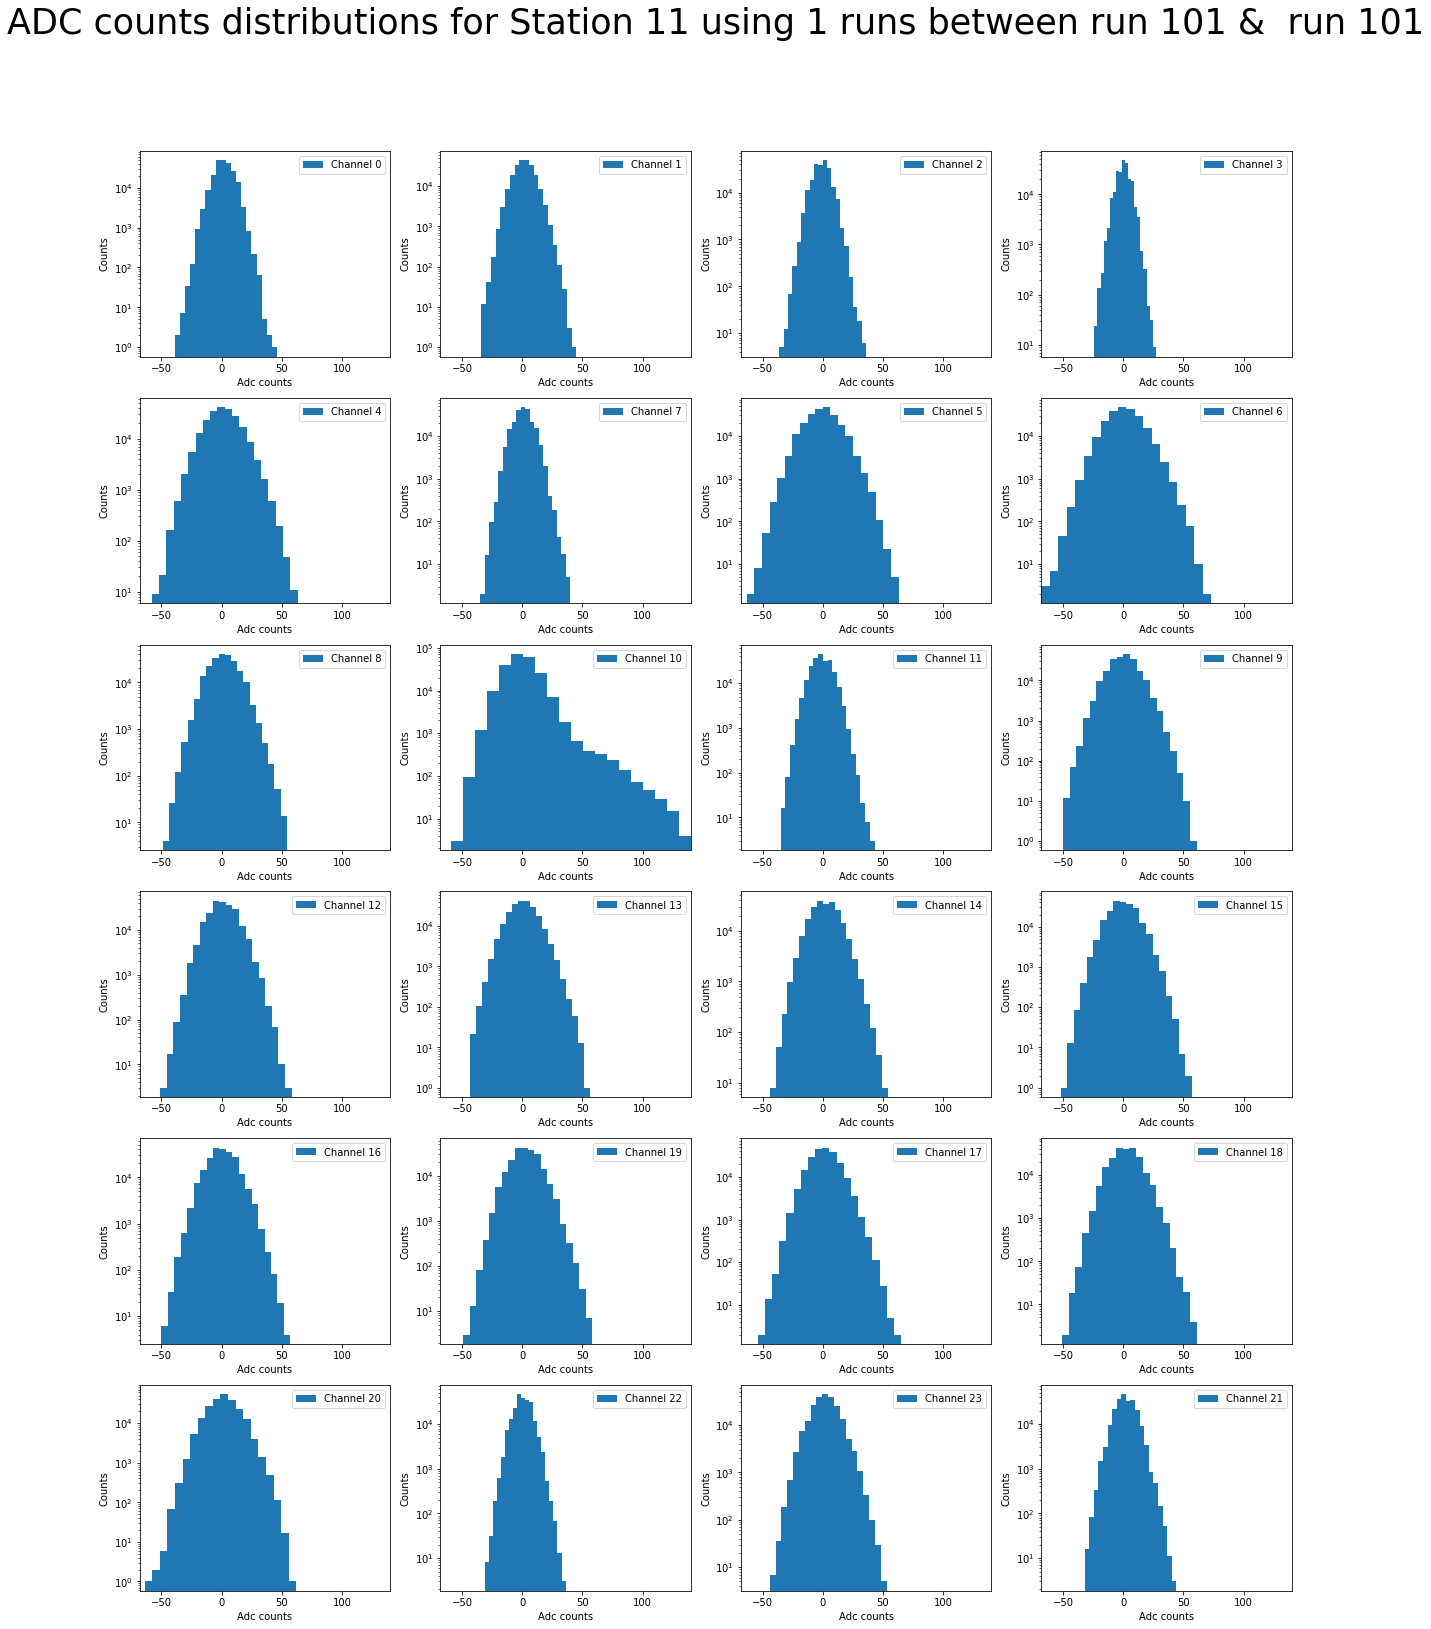

The ADCDist for one run took 8.543698787689209 seconds of time


In [3]:
Pre_ADCDistTime = time.time()
ADCDist(11,[101],NBins=20,WPed=False)
TimediffADCDist=time.time() - Pre_ADCDistTime
print("The ADCDist for one run took %s seconds of time" % (TimediffADCDist))

If I want this to maximally take 5 minutes I can use the following amount of runs:

In [4]:
print(str(5*60/TimediffADCDist) + " amount of runs")

35.113597454099875 amount of runs


Doing this for all 713 runs of station 11 would take about

In [5]:
print(str(TimediffADCDist*713/60) + " minutes")

101.52762059370677 minutes


## One specific channel & run

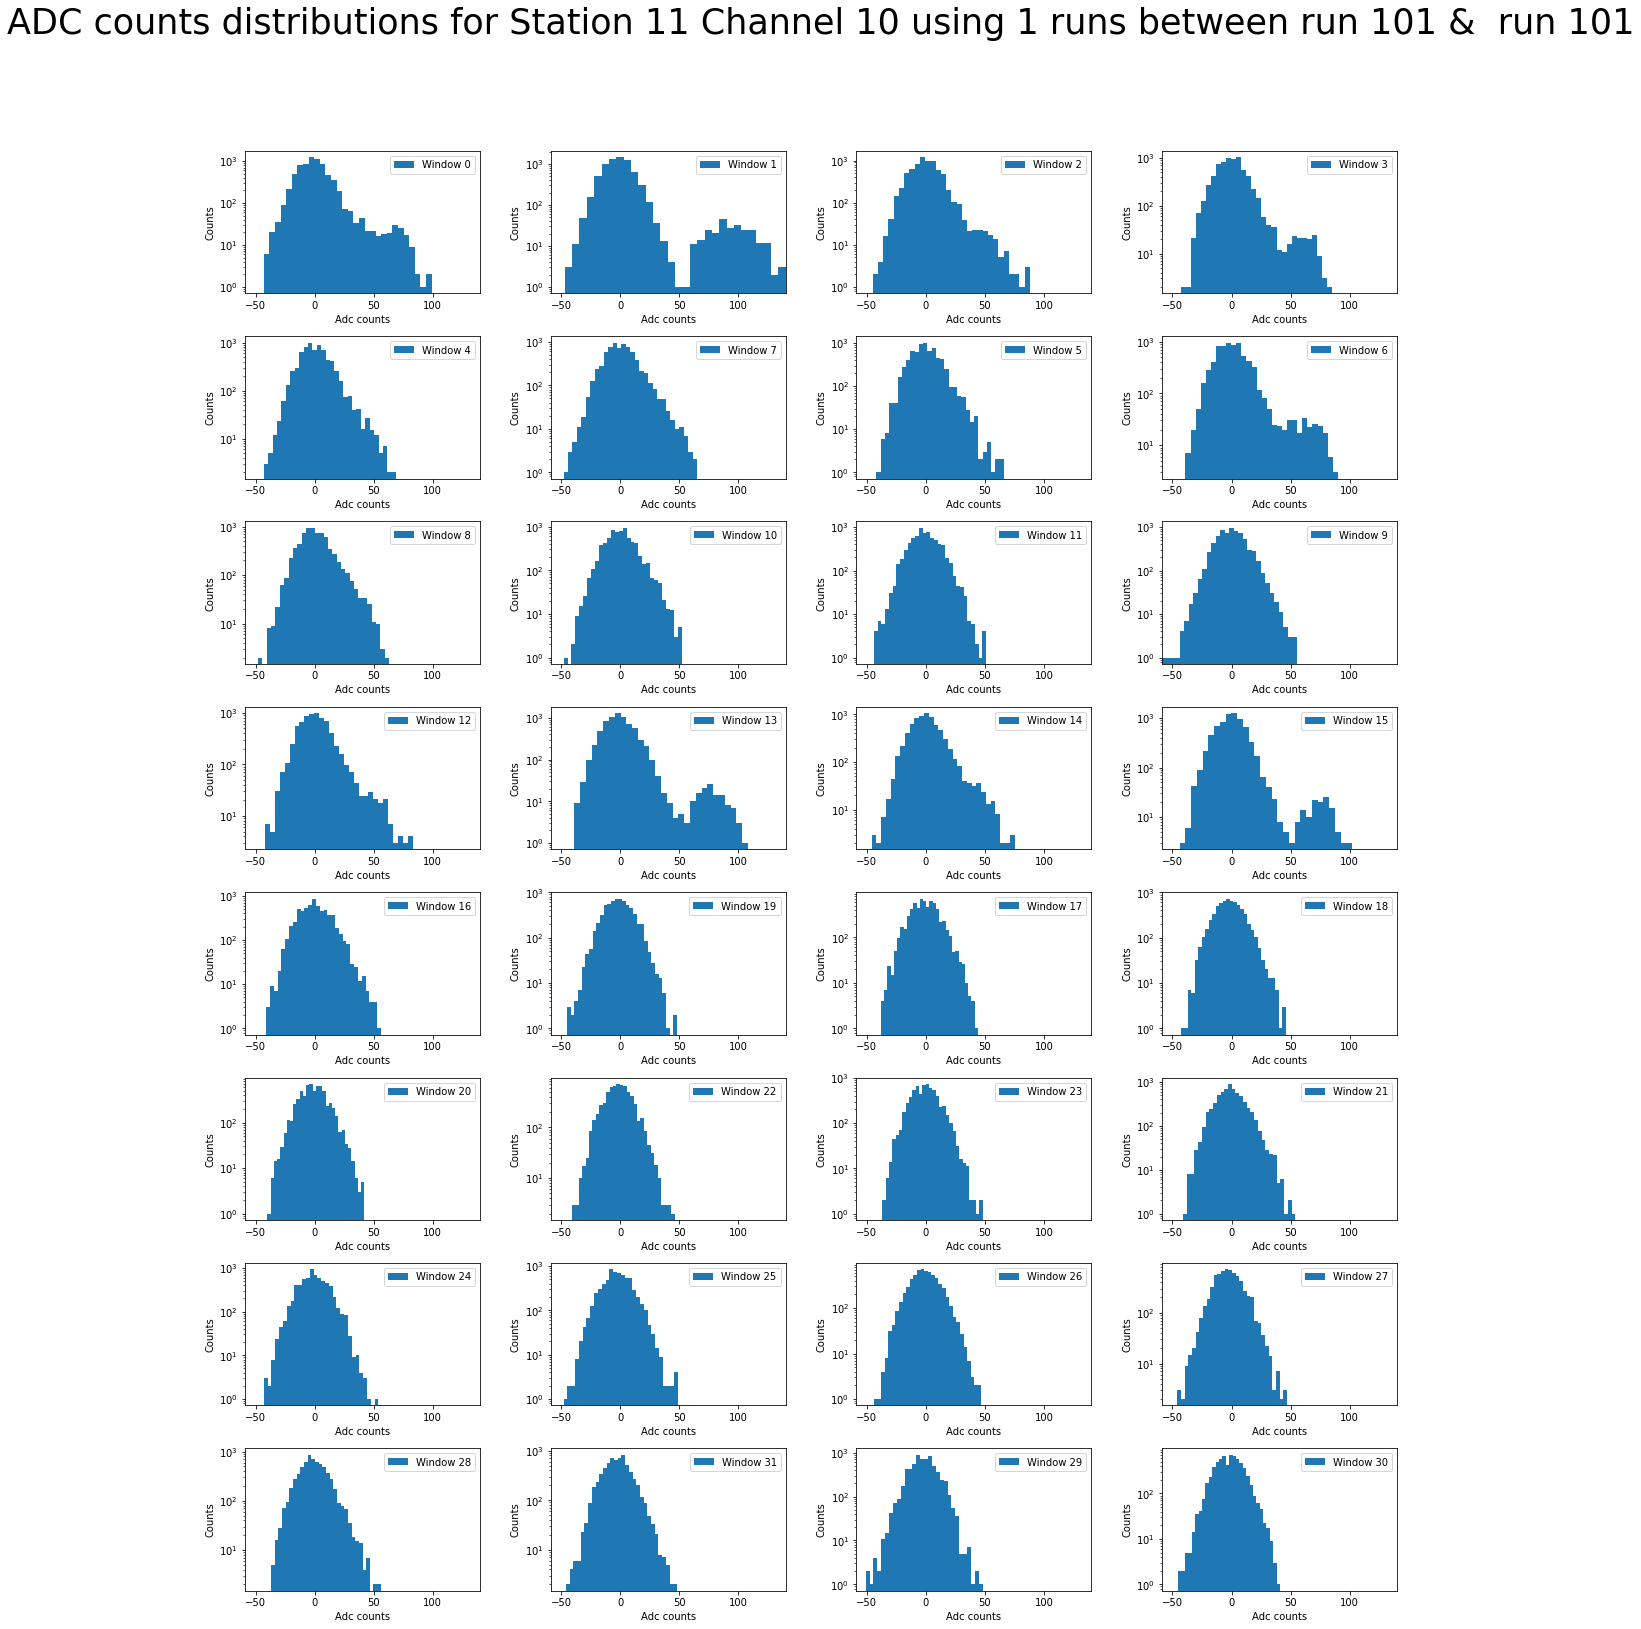

The ADCDistChRun for one run took 18.387428283691406 seconds of time


In [6]:
Pre_ADCDistChRunTime = time.time()
#ADCDistChRun(10,RadiantDataWPedSt11R101,StartWindowSt11R101,EventNrsSt11R101,NBins=30)
ADCDistCh(11,10,[101],NBins=30,WPed=False)
TimediffADCDistChRun=time.time() - Pre_ADCDistTime
print("The ADCDistChRun for one run took %s seconds of time" % (TimediffADCDistChRun))

If I want this to maximally take 5 minutes I can use the following amount of runs:

In [7]:
print(str(5*60/TimediffADCDistChRun) + " amount of runs")

16.315495314050132 amount of runs


Doing this for all 713 runs of station 11 would take about

In [8]:
print(str(TimediffADCDistChRun*713/60) + " minutes")

218.50393943786622 minutes


## For higher amount of runs

### Station 11:

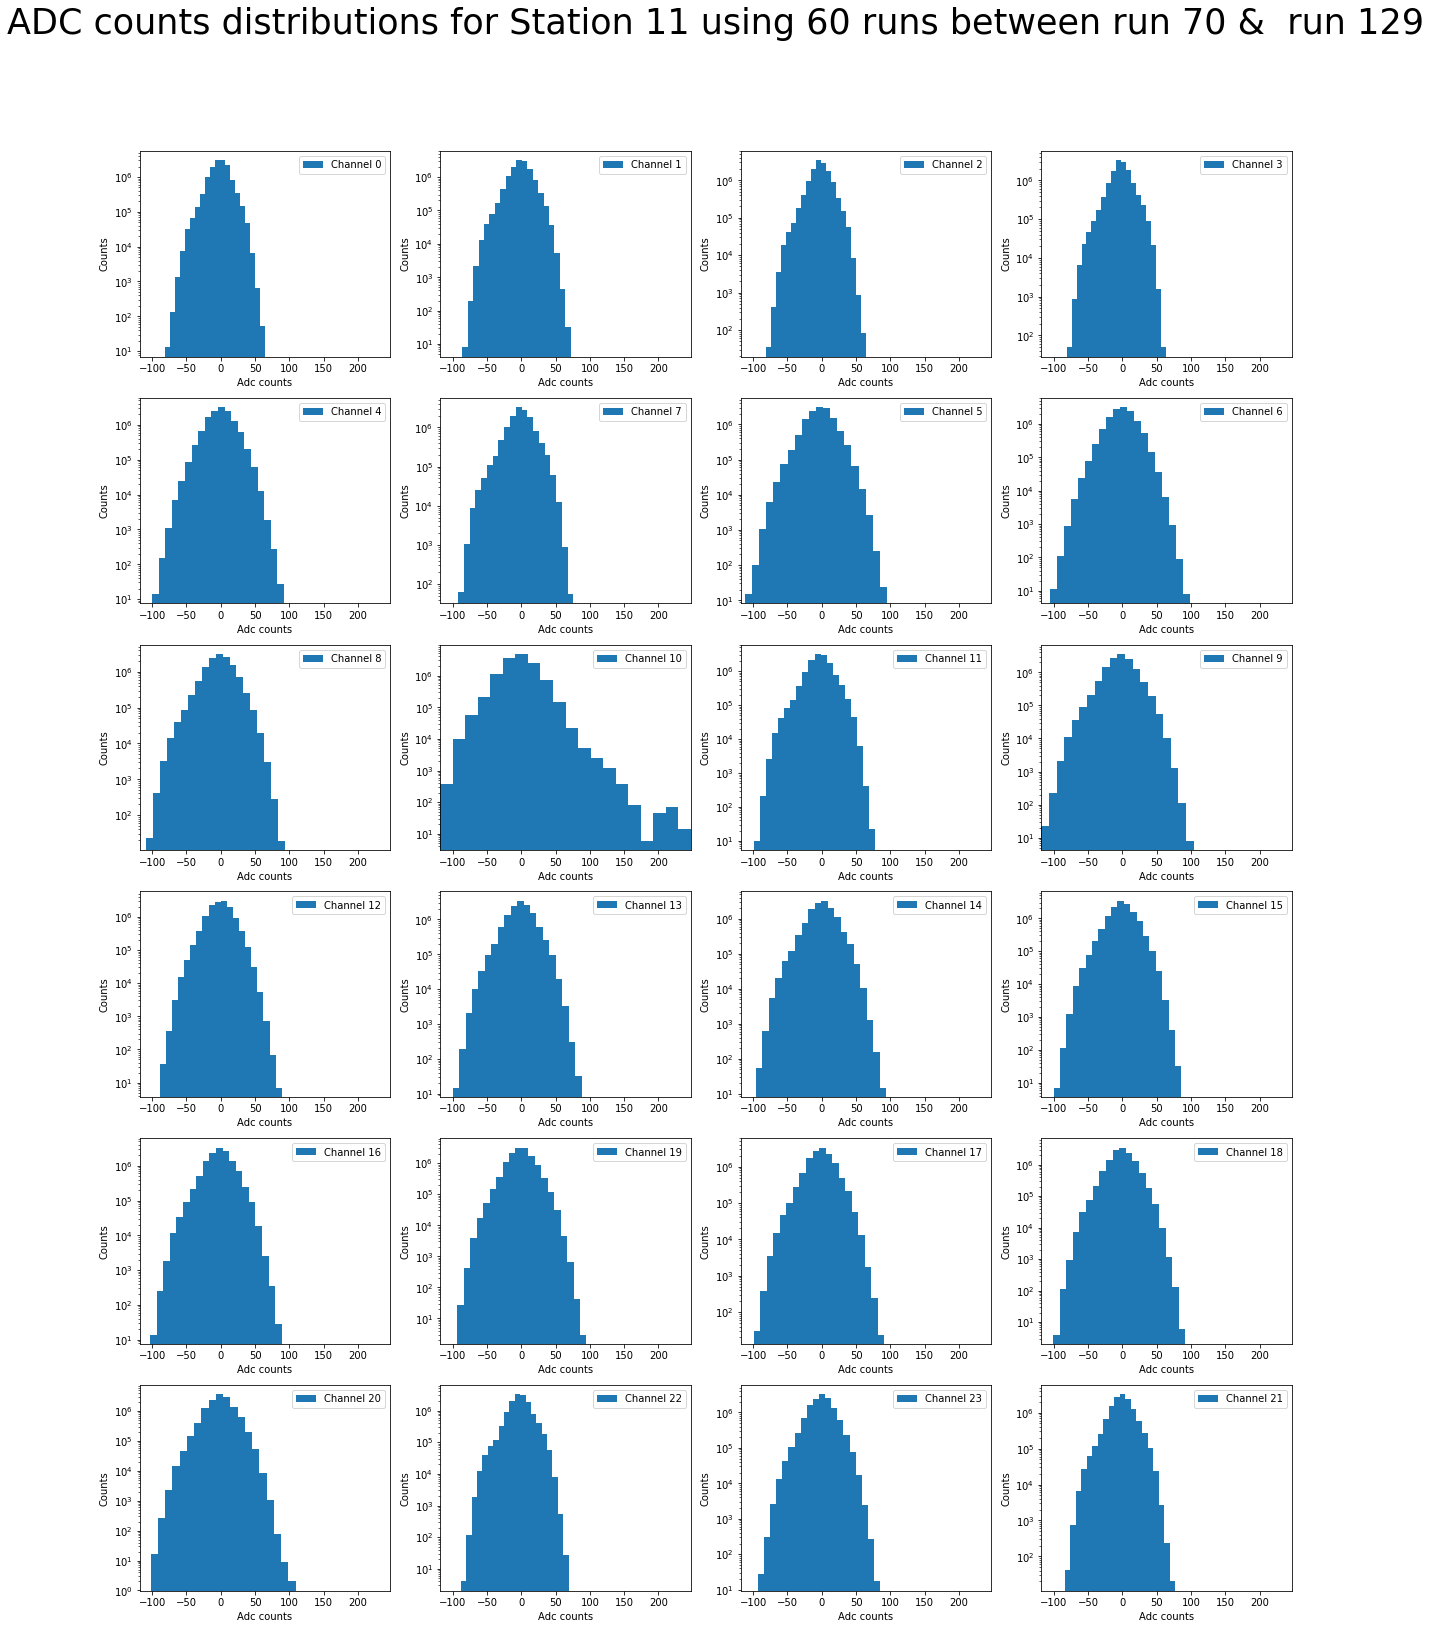

The ADCDist took 23.084780883789062 minutes of time


In [9]:
t0 = time.time()
ADCDist(11,range(70,130),NBins=20,WPed=False)
dt=time.time() - t0
print("The ADCDist took %s minutes of time" % (dt/60))

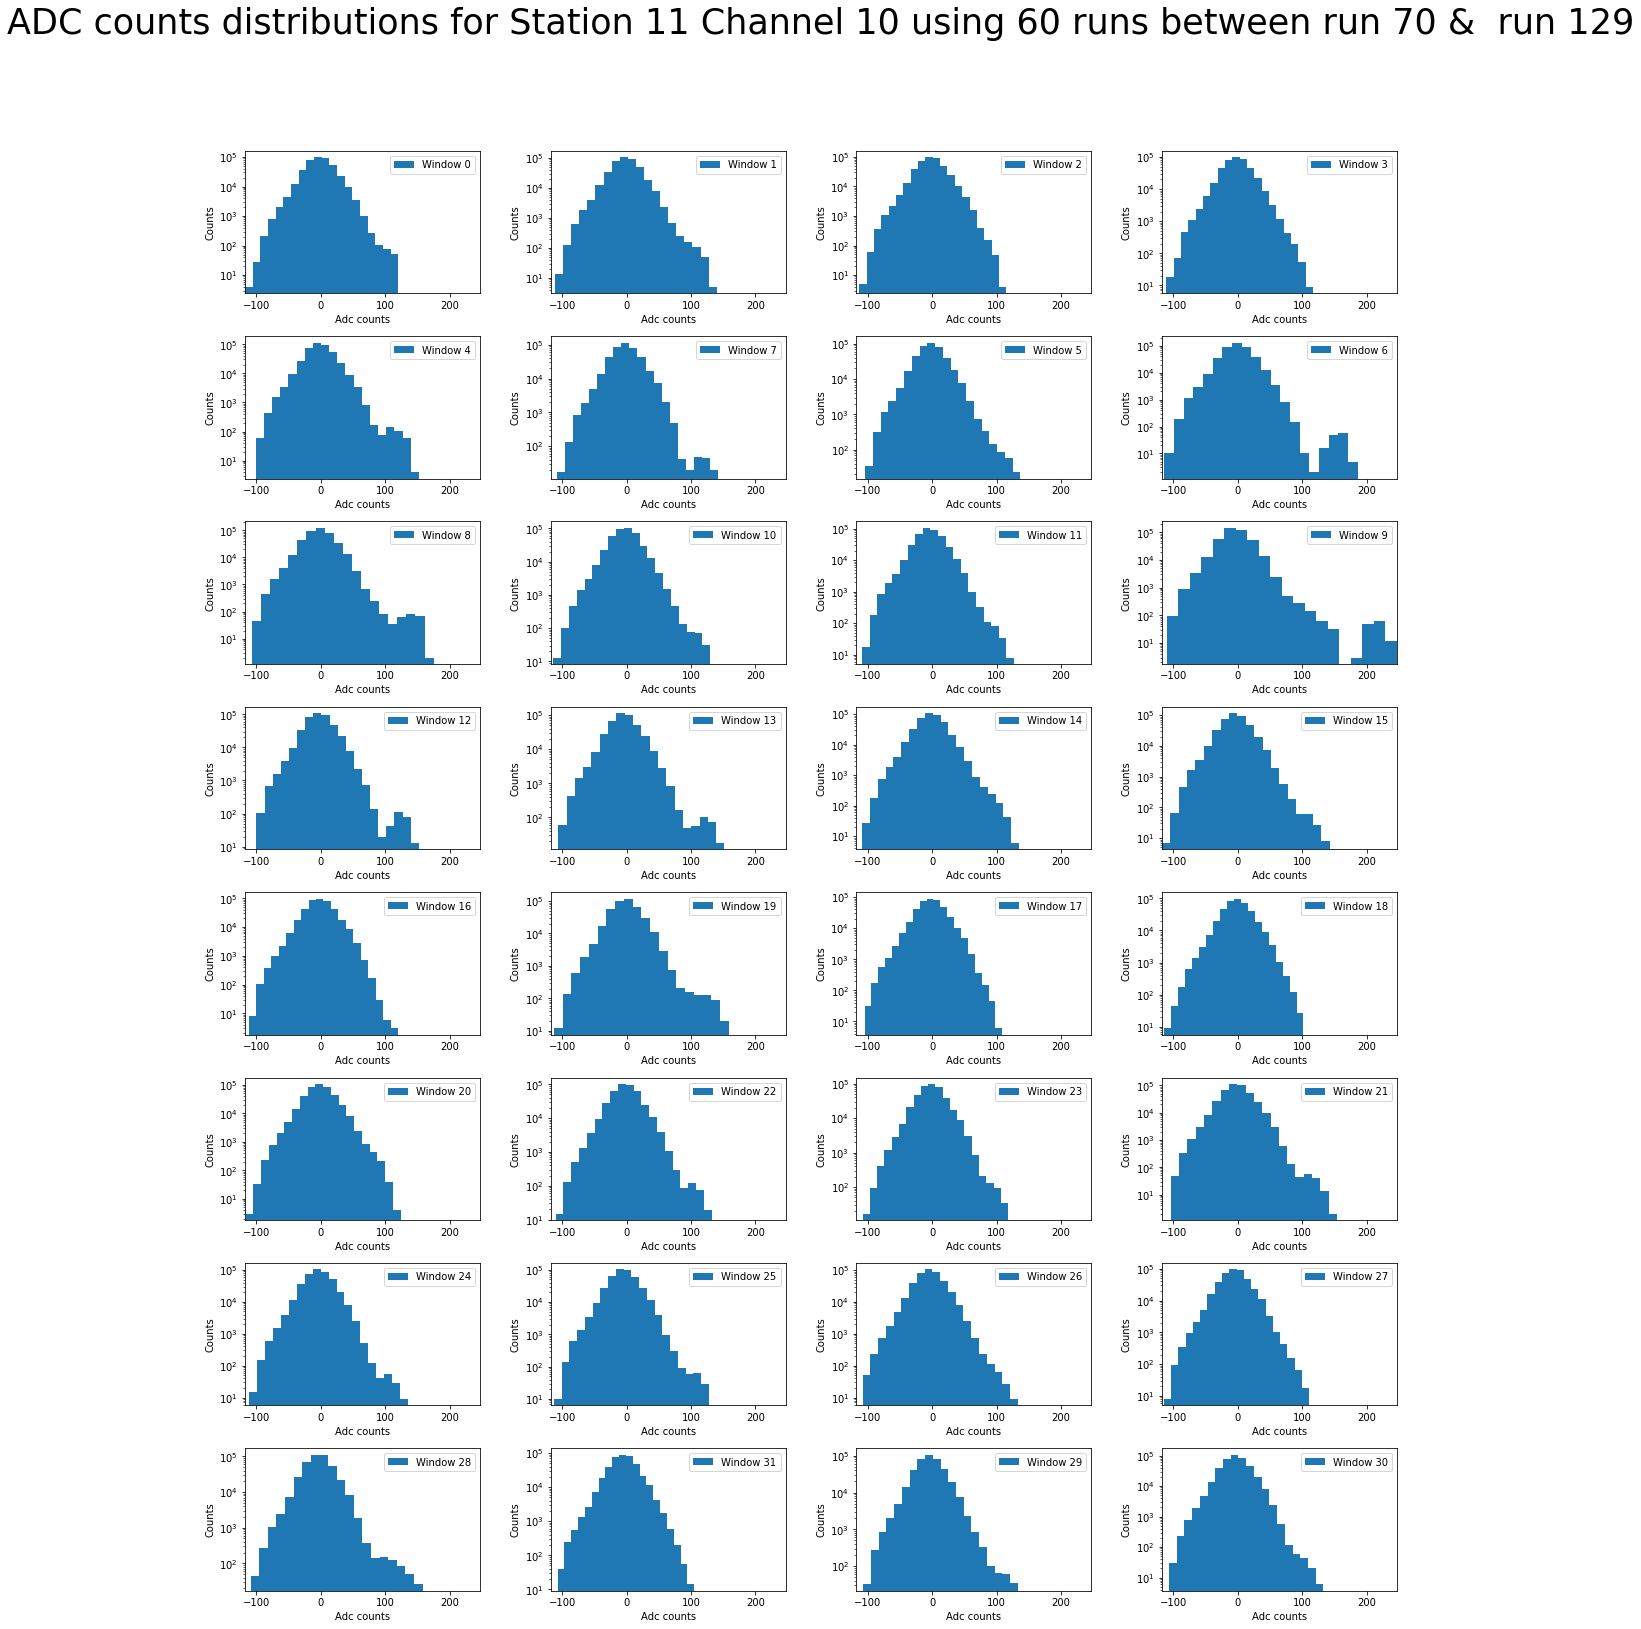

The ADCDistCh took 1.0021969676017761 minutes of time


In [5]:
t0 = time.time()
ADCDistCh(11,10,range(70,130),NBins=20,WPed=False)
dt=time.time() - t0
print("The ADCDistCh took %s minutes of time" % (dt/60))

### Station 21:

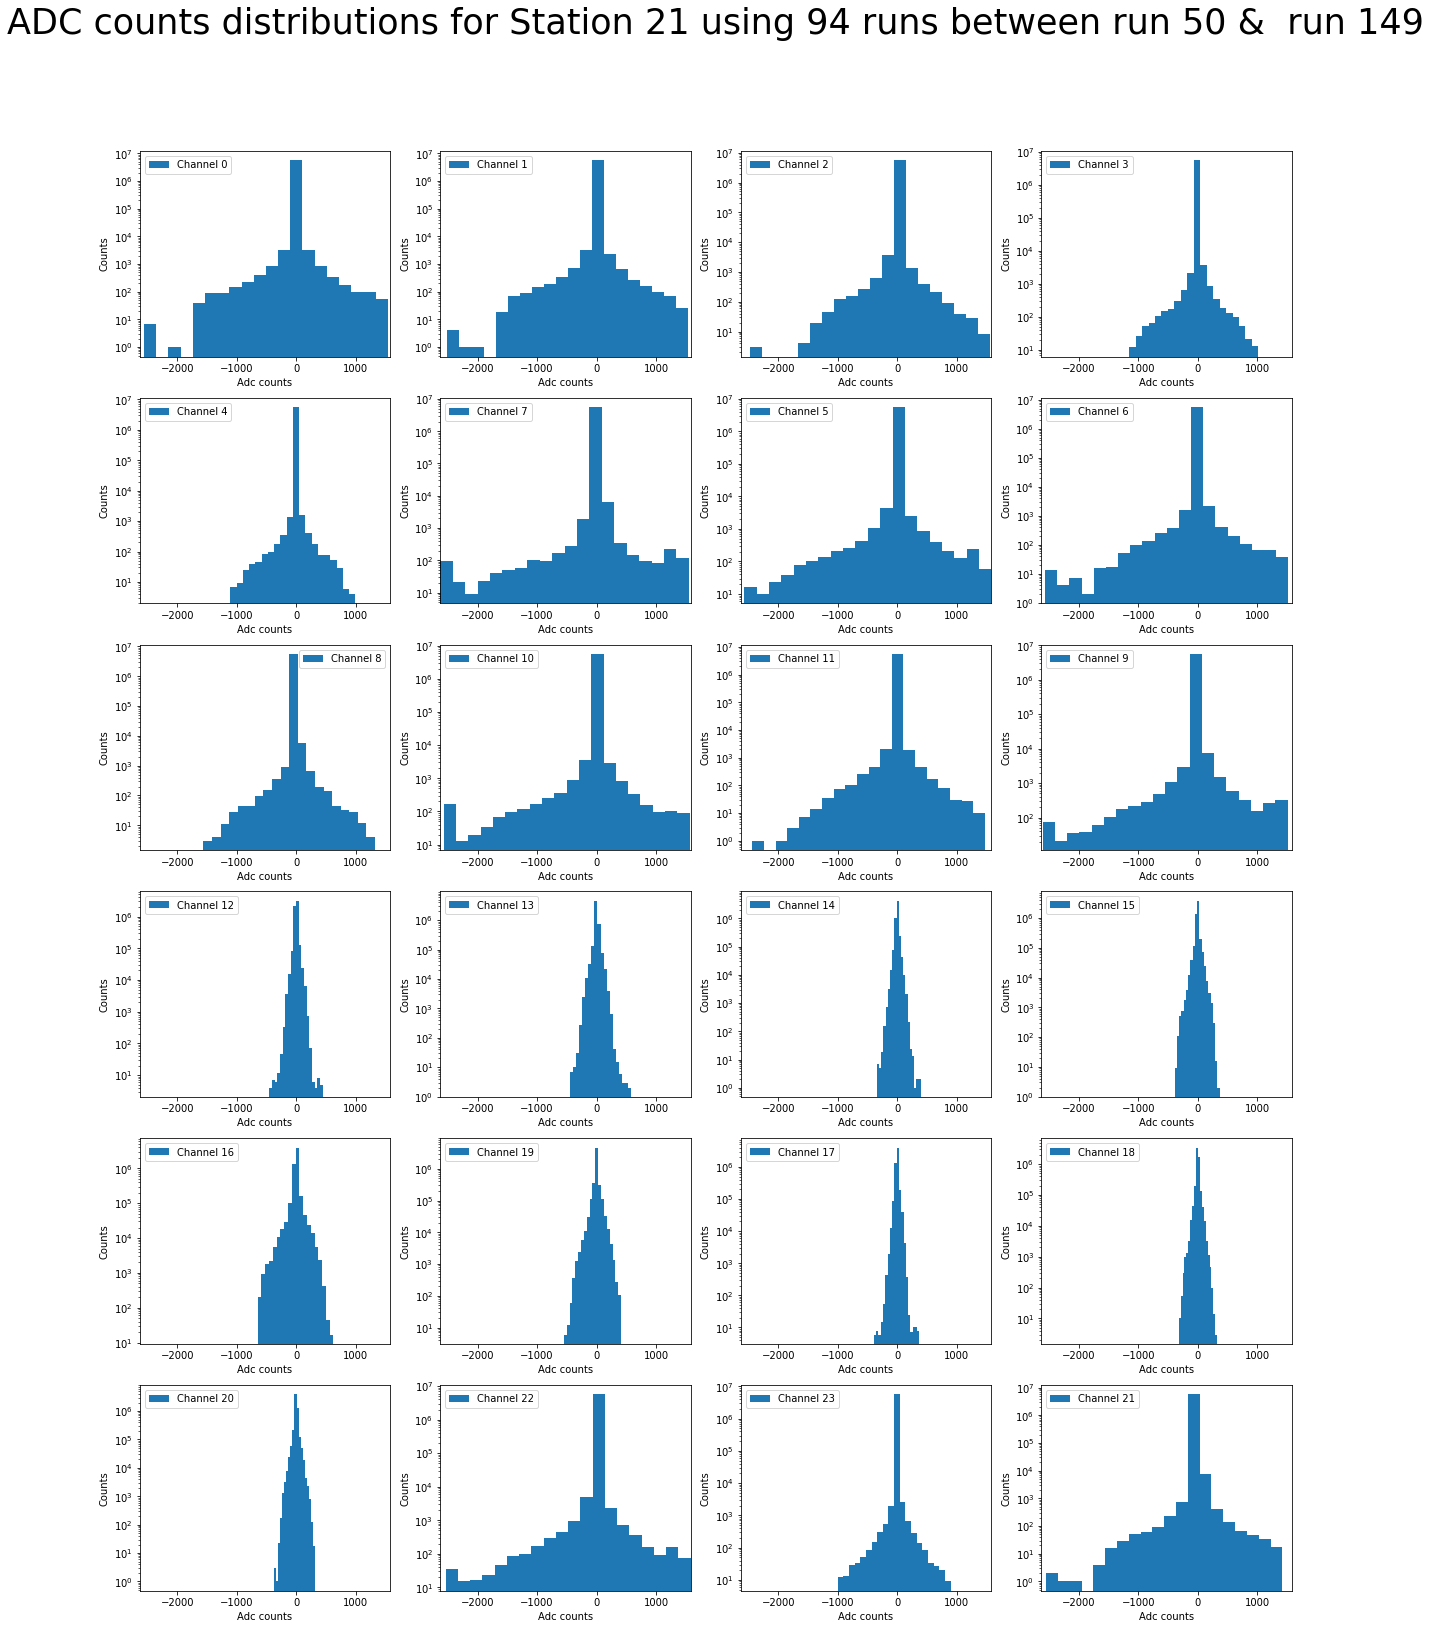

The ADCDist took 3.4878281275431315 minutes of time


In [11]:
t0 = time.time()
ADCDist(21,range(50,150),NBins=20,WPed=False)
dt=time.time() - t0
print("The ADCDist took %s minutes of time" % (dt/60))

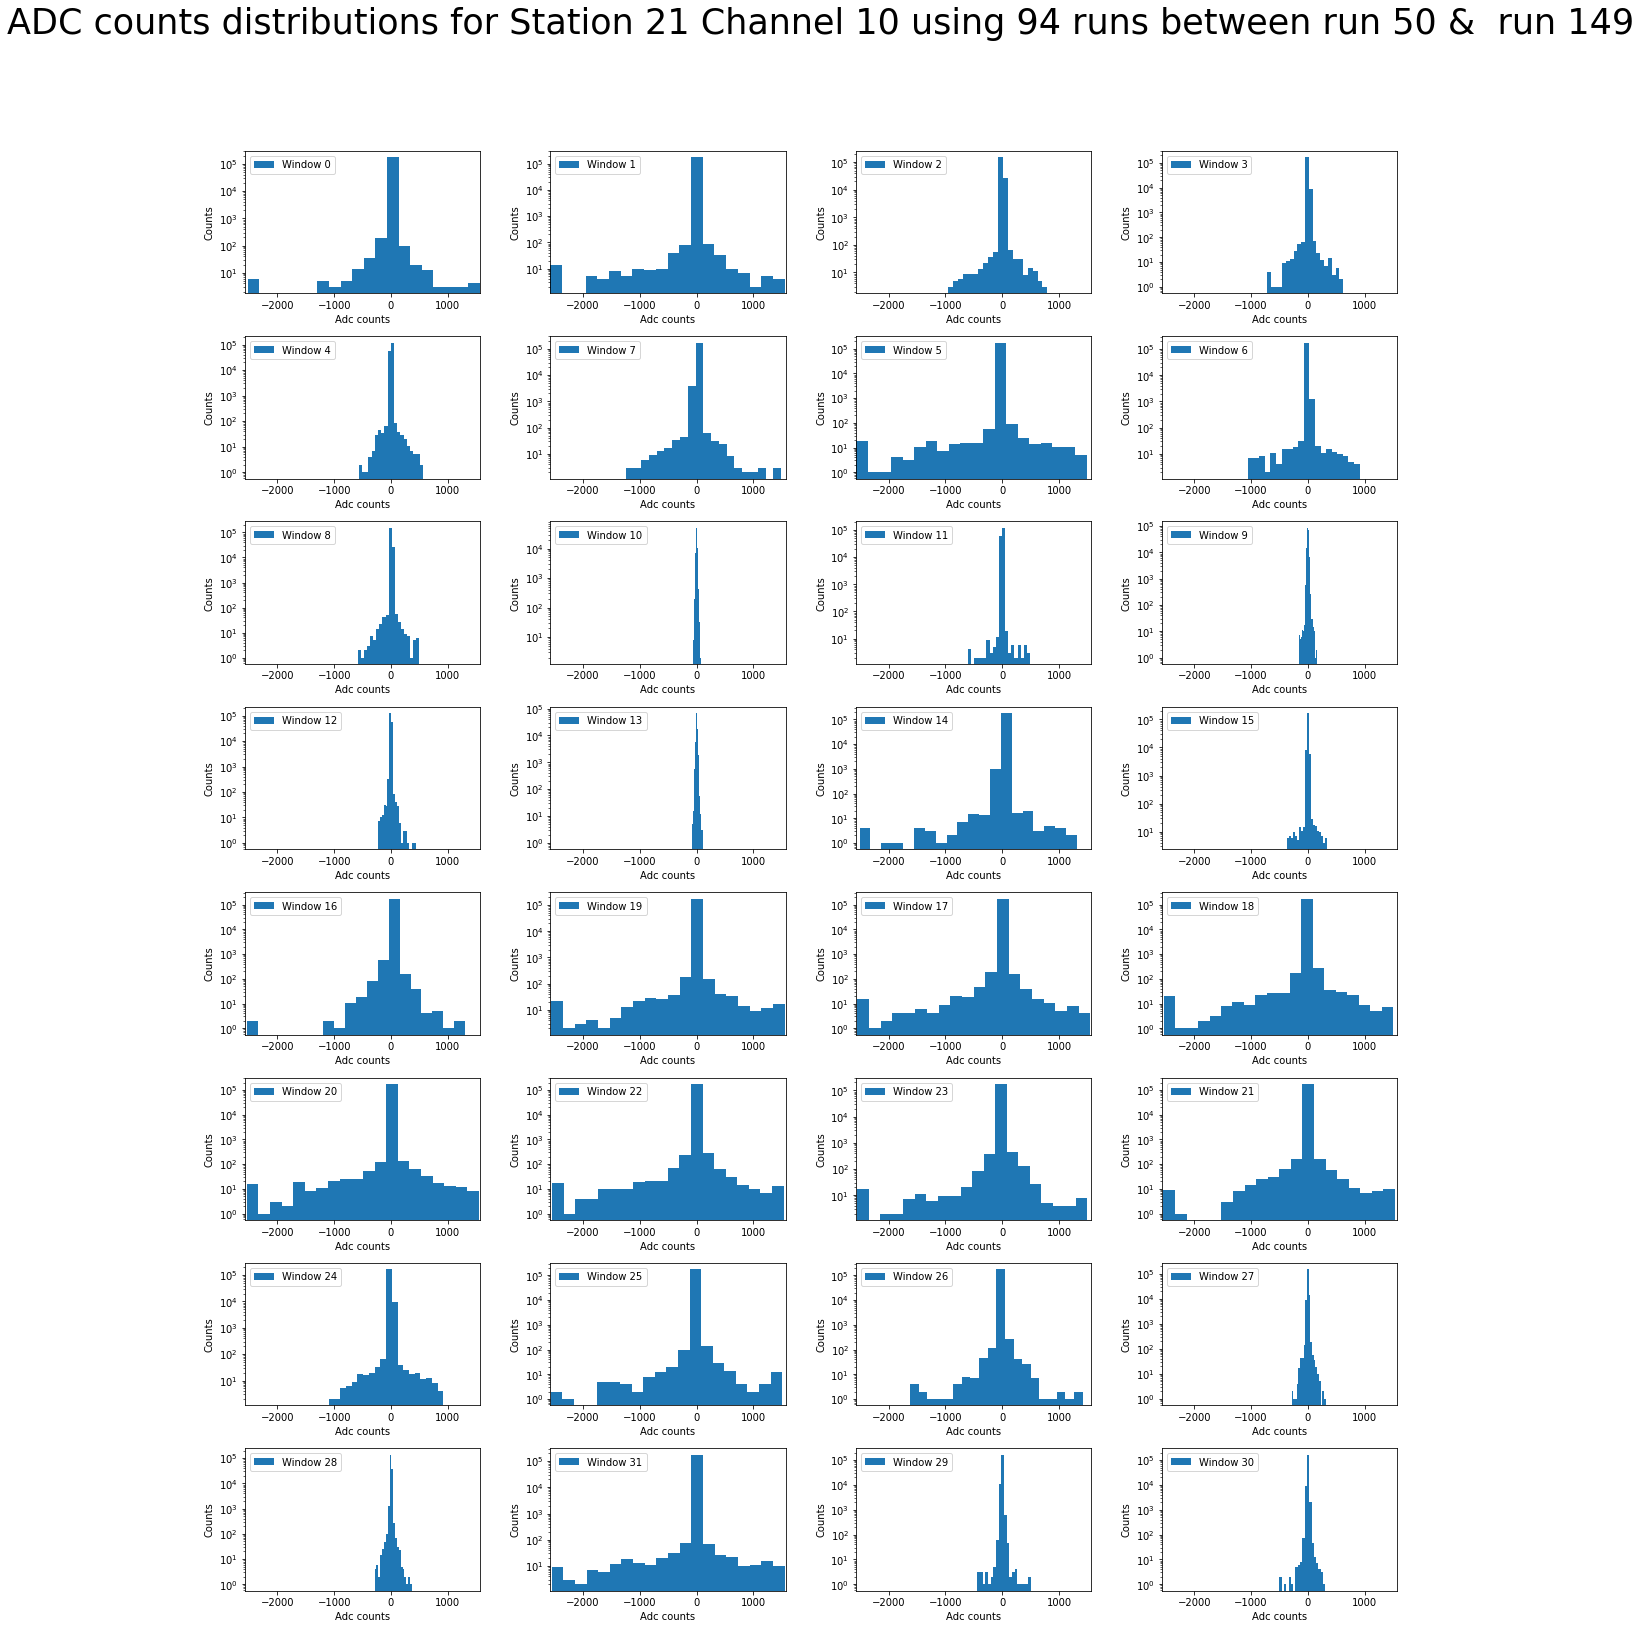

The ADCDistCh took 0.5507795333862304 minutes of time


In [12]:
t0 = time.time()
ADCDistCh(21,10,range(50,150),NBins=20,WPed=False)
dt=time.time() - t0
print("The ADCDistCh took %s minutes of time" % (dt/60))

Plotting ADC count distribution for runs in range of 50->150 yielded extreme values <br>
=> Checked the run summary for comments in this range but none were found <br>
=> plot the  time traces of this range as a function of time 

Obvious problematic extremities.
Trial & error => Most problematic cases in this range seem lumped together => try to find range of problematic cases

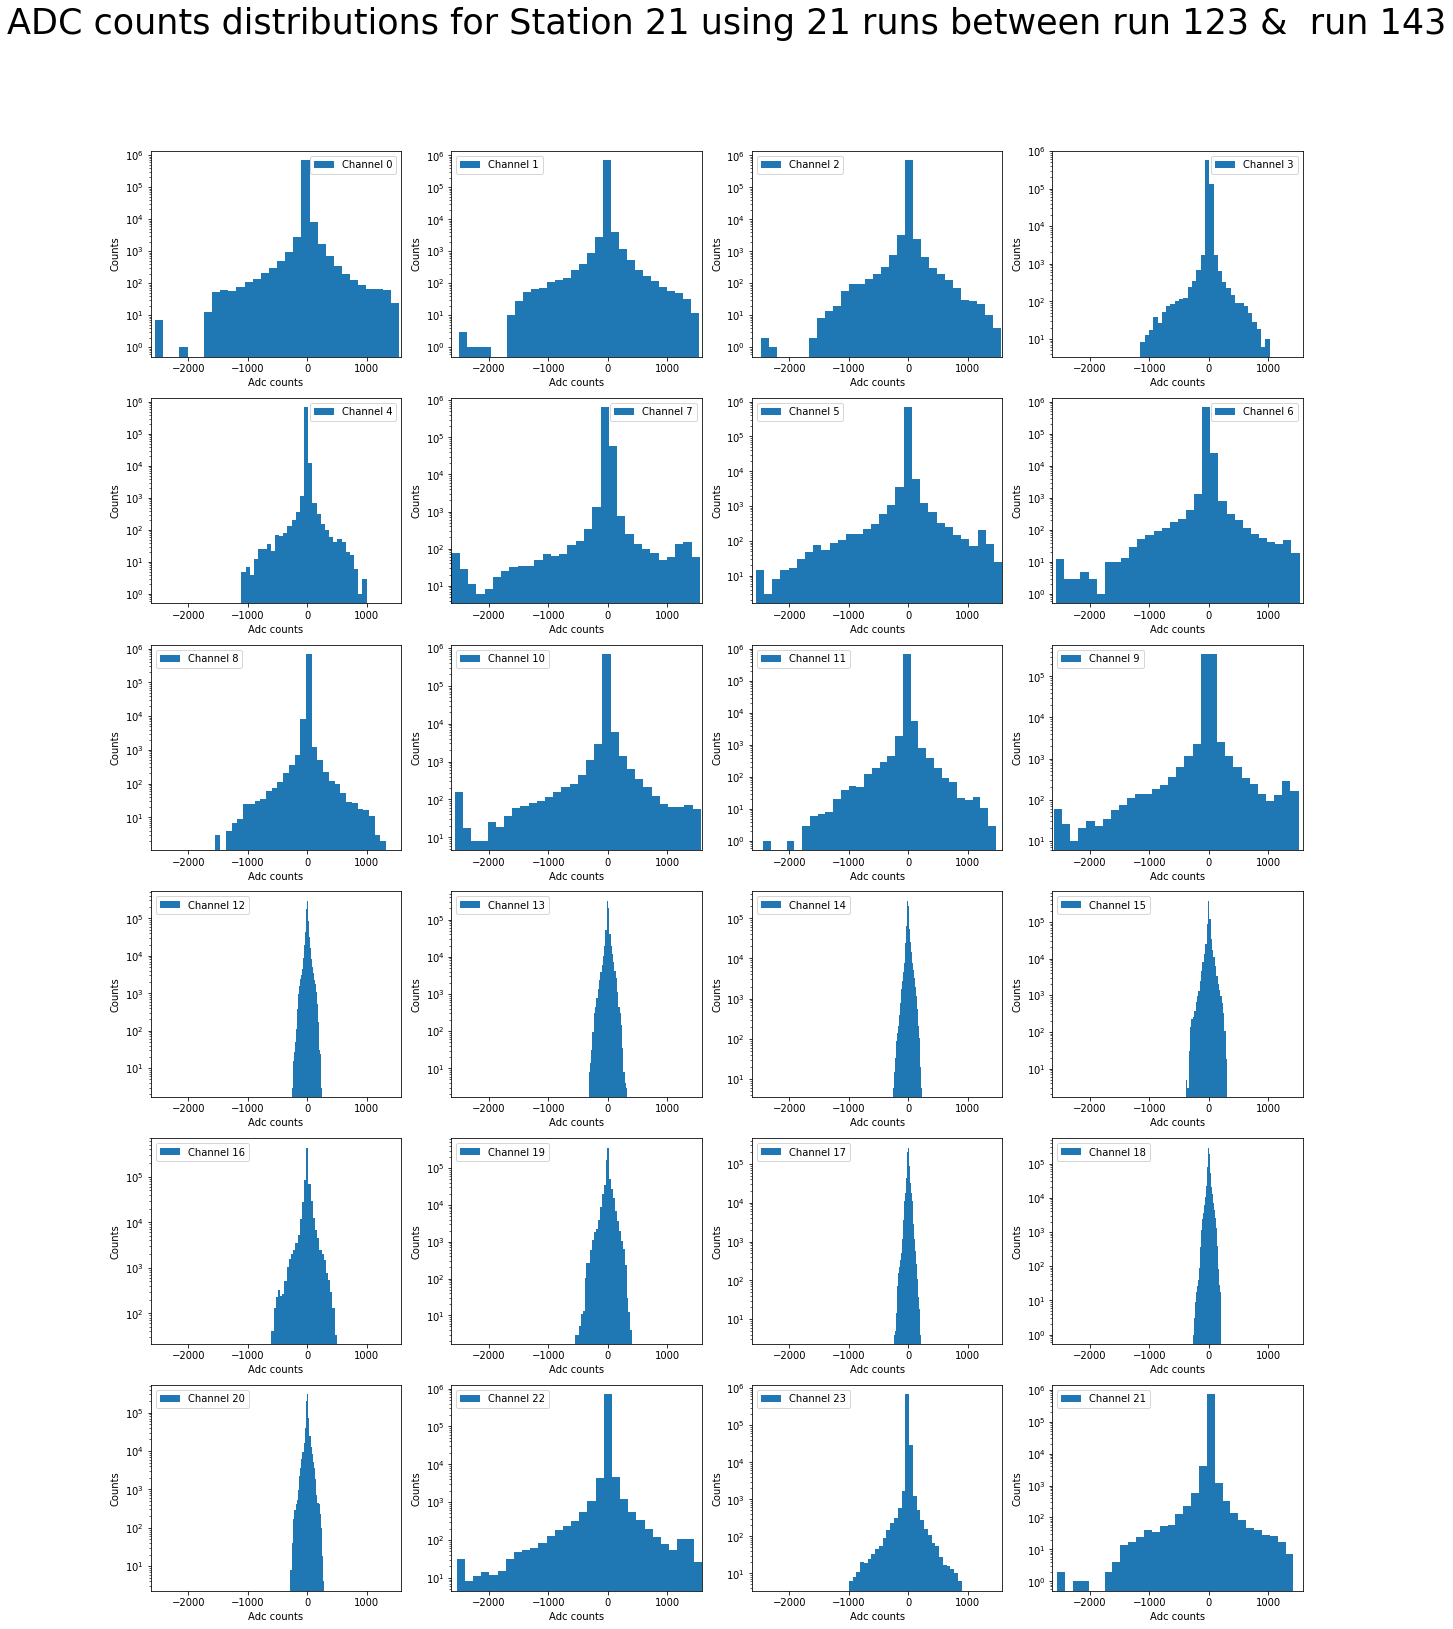

In [13]:
ADCDist(21,range(123,144),NBins=30,WPed=False)

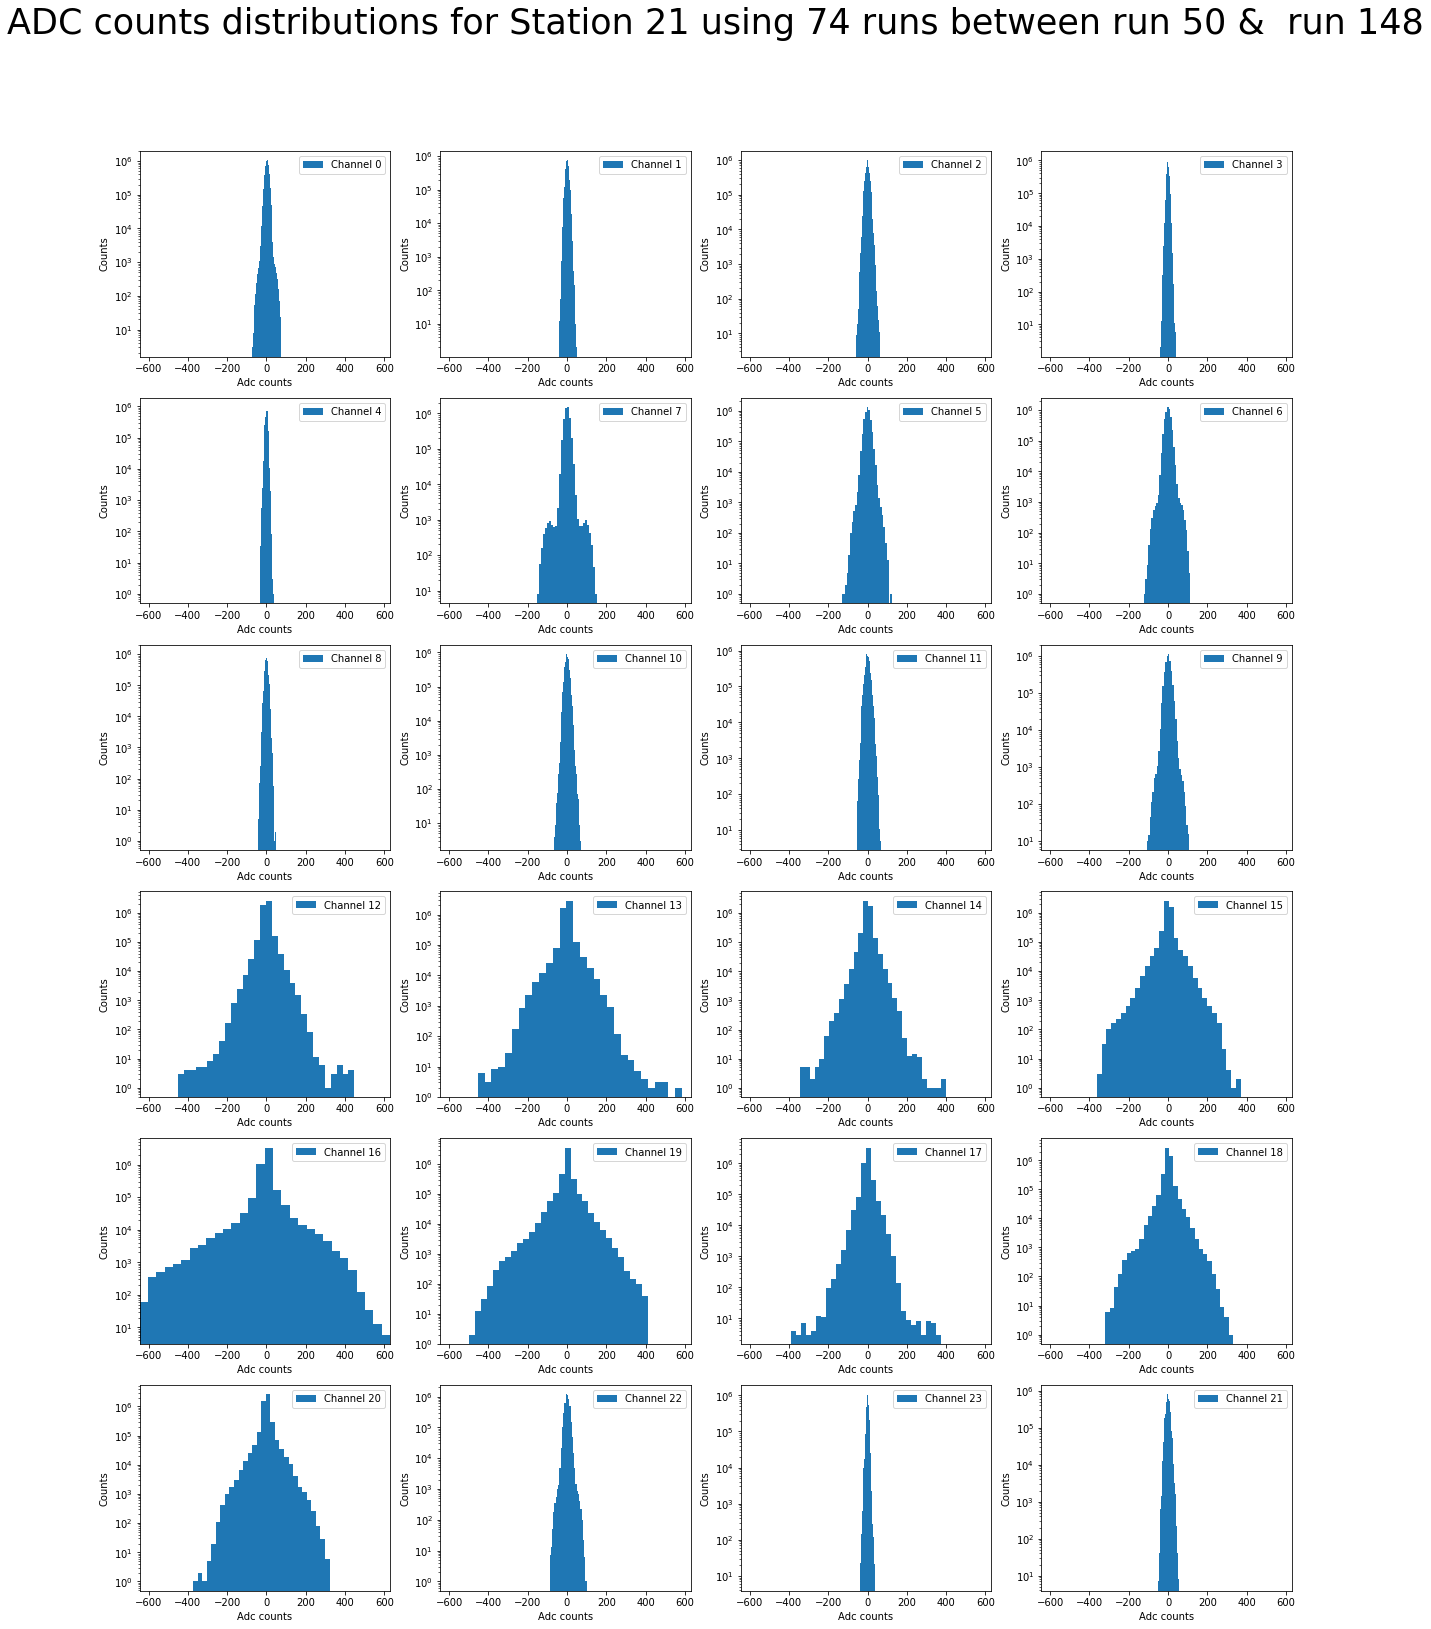

In [14]:
ADCDist(21,list(range(50,125)) + list(range(144,149)),NBins=30,WPed=False)

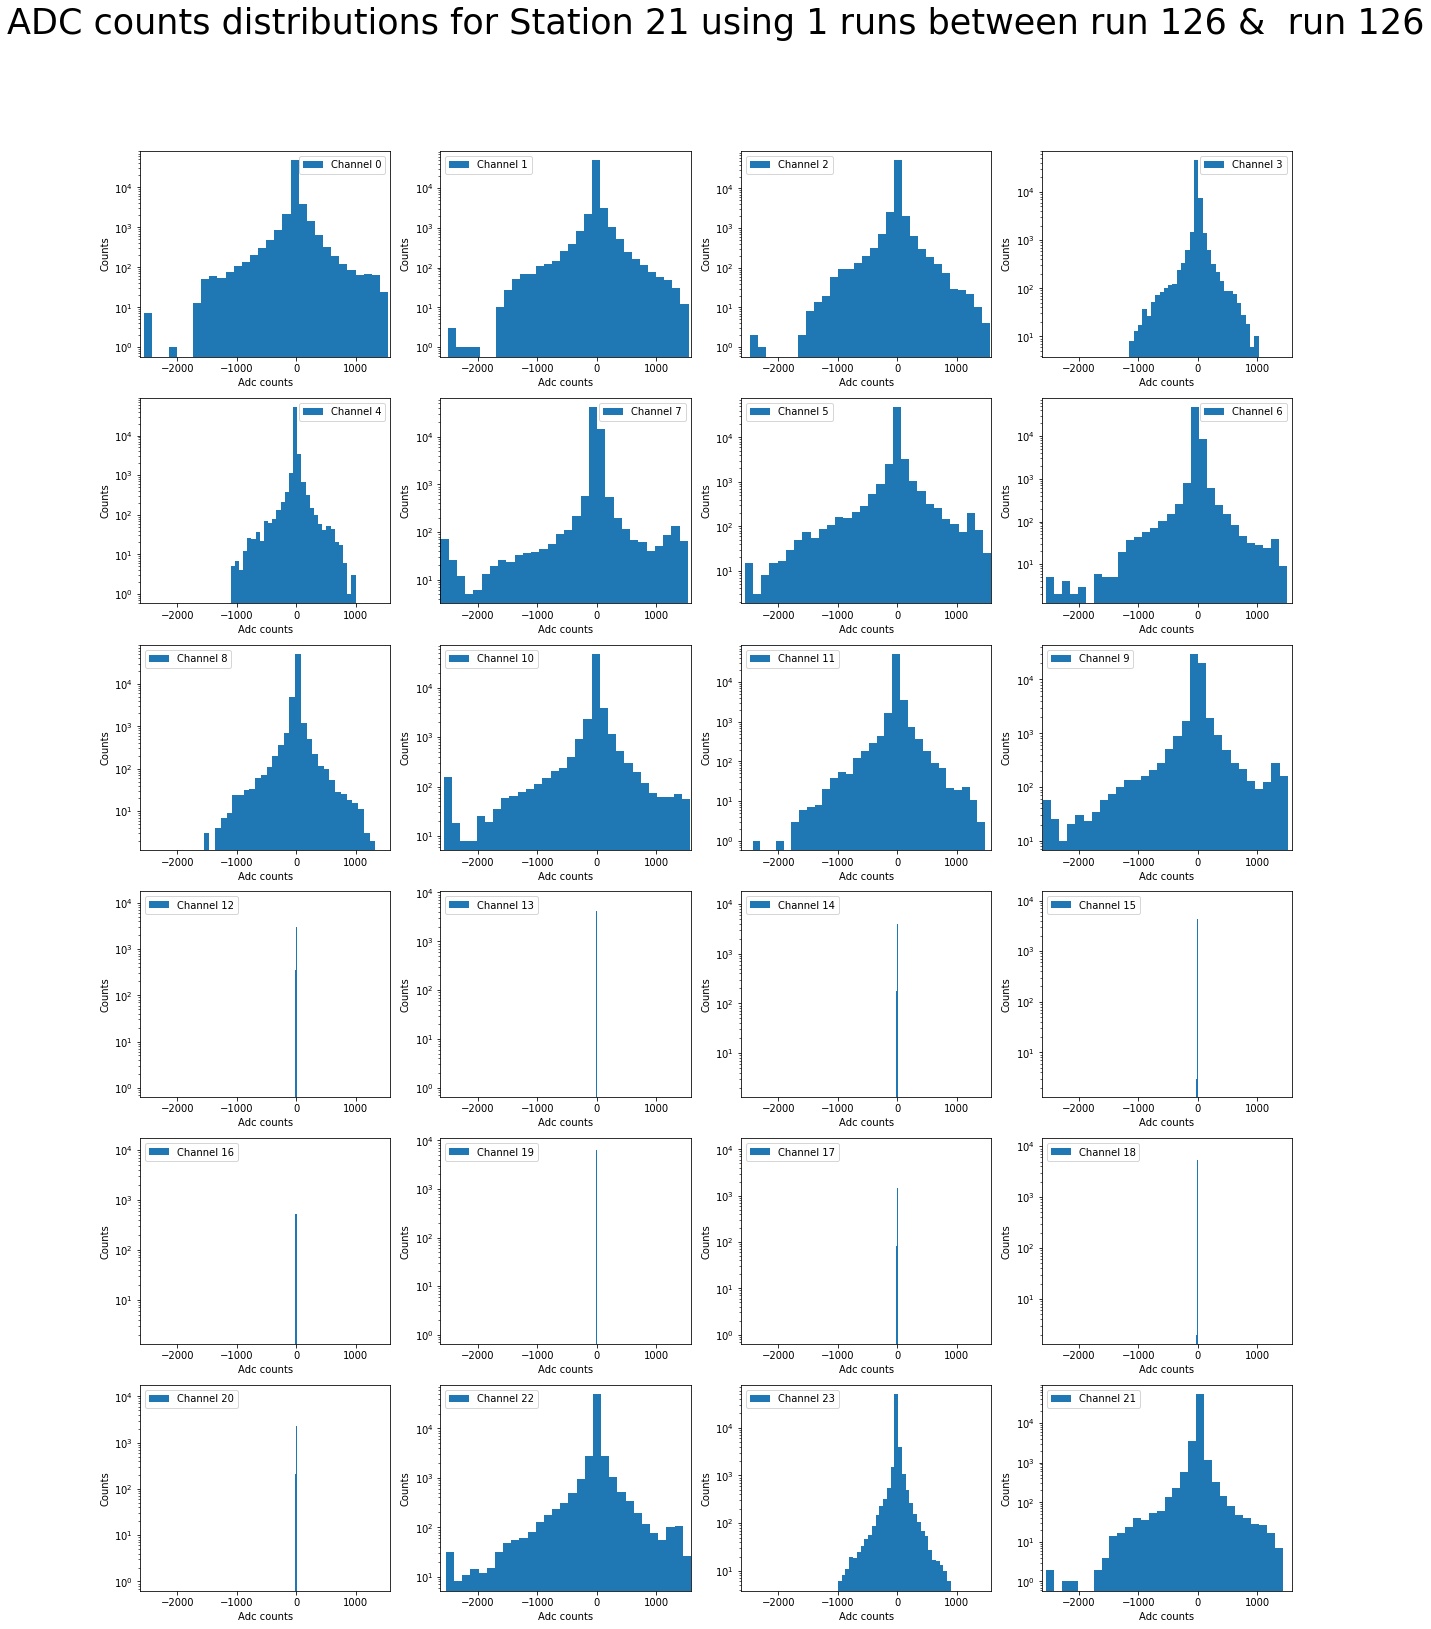

In [15]:
ADCDist(21,[126],NBins=30,WPed=False)

In [16]:
CombinedFileSt21R126, DAQStatFileSt21R126, HeadersFileSt21R126, PedestalFileSt21R126=FilesStRun(21,126)
RadiantDataSt21R126=CombinedFileSt21R126['combined']['waveforms']['radiant_data[24][2048]'].array(library='np')
EventNrsSt21R126=CombinedFileSt21R126['combined']['waveforms']['event_number'].array(library="np")
PedestalDataSt21R126=PedestalFileSt21R126['']['pedestals[24][4096]'].array(library='np')
StartWindowSt21R126 = np.array(CombinedFileSt21R126['combined']['header/trigger_info/trigger_info.radiant_info.start_windows[24][2]'])

In [17]:
EventNrsSt21R126.shape

(29,)

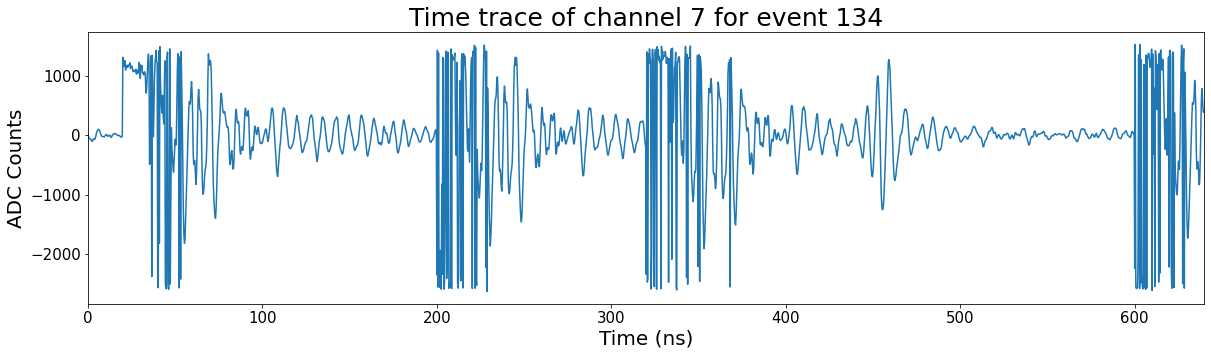

In [18]:
TimeTrace(7,EventNrsSt21R126[0],RadiantDataSt21R126,EventNrsSt21R126)

Extreme values can be seen in the time trace of certain runs as well.
Could be the same anomaly as mentioned in the RNO-G collaboration meeting concerning

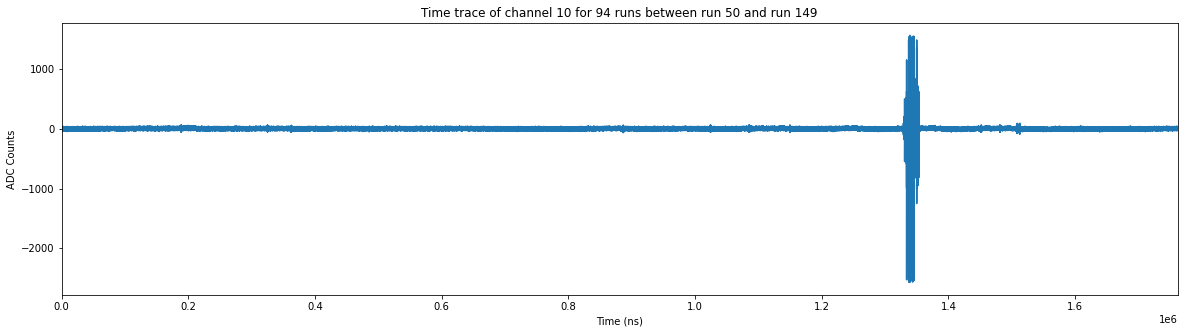

In [19]:
TimeTraces(21,range(50,150),10,WPed=False)

Focus more on the problematic regime:

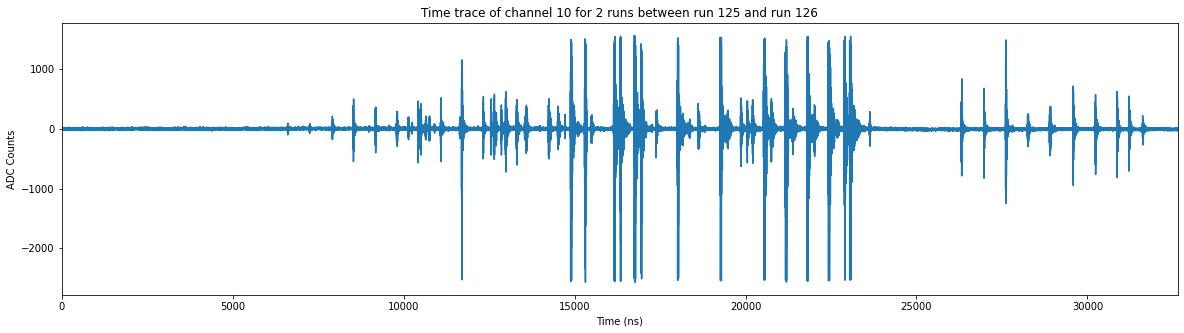

In [20]:
TimeTraces(21,range(125,127),10,WPed=False)

For all channels:

In [21]:
#for ChNr in range(24):
#    TimeTraces(21,range(50,150),ChNr,WPed=False)

Same extremely high values around runs 125->127 for all channels except for channels 12->20 where instead of extremely high values we see practically no signal. Leaving out the problematic range (runs 125->127) we get:

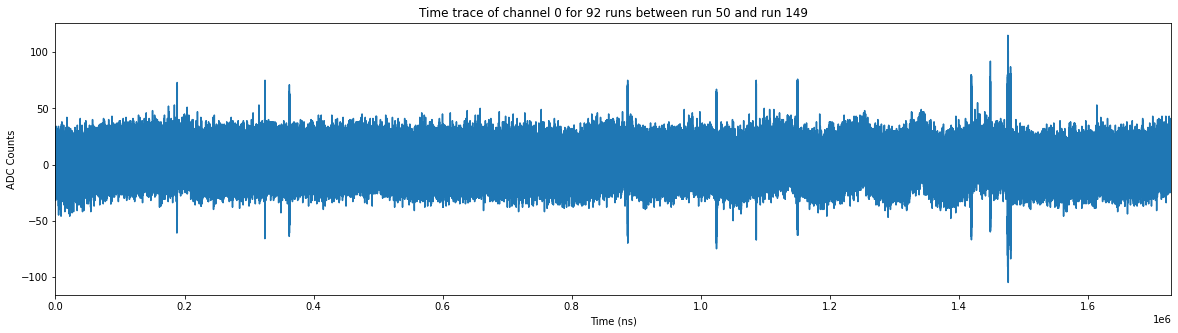

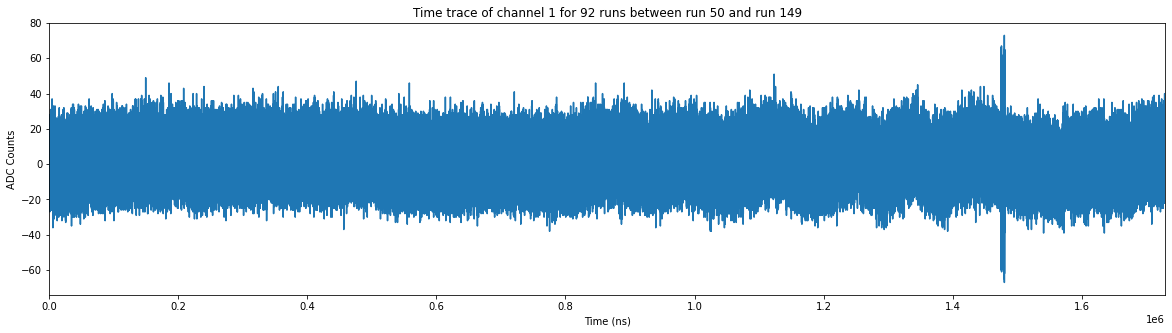

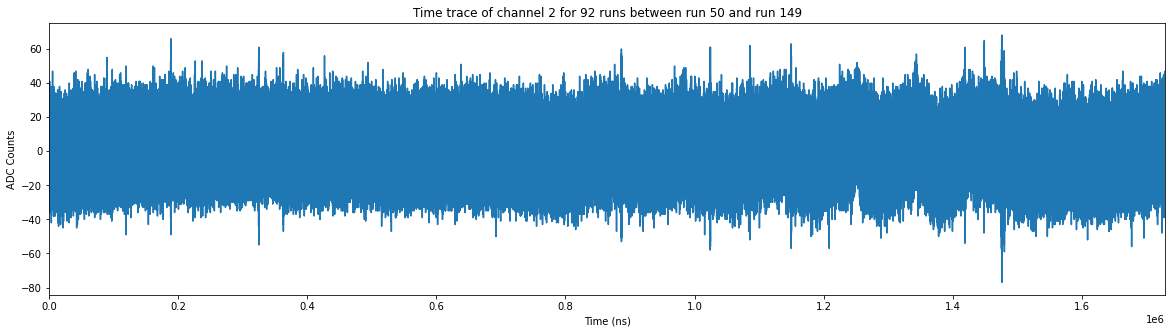

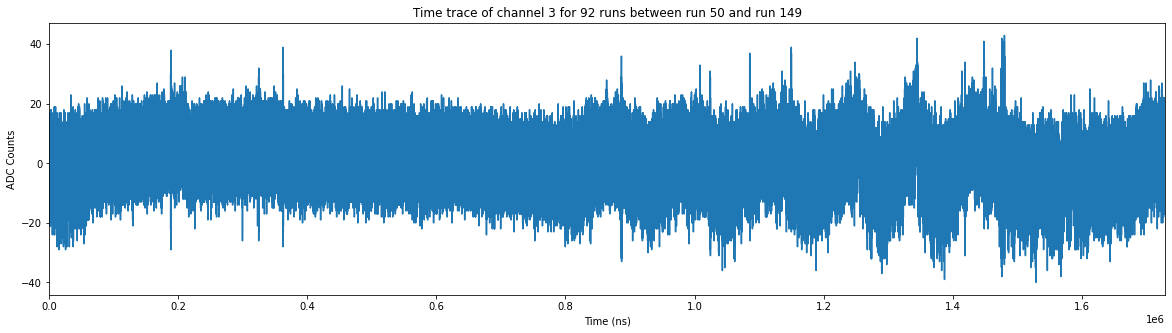

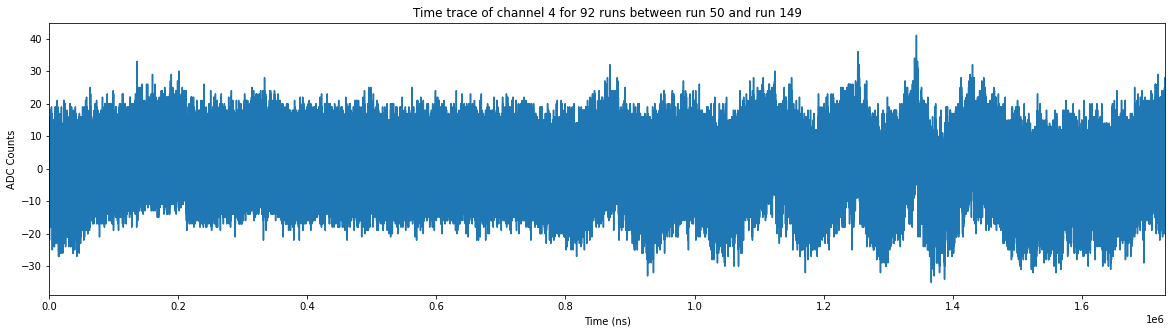

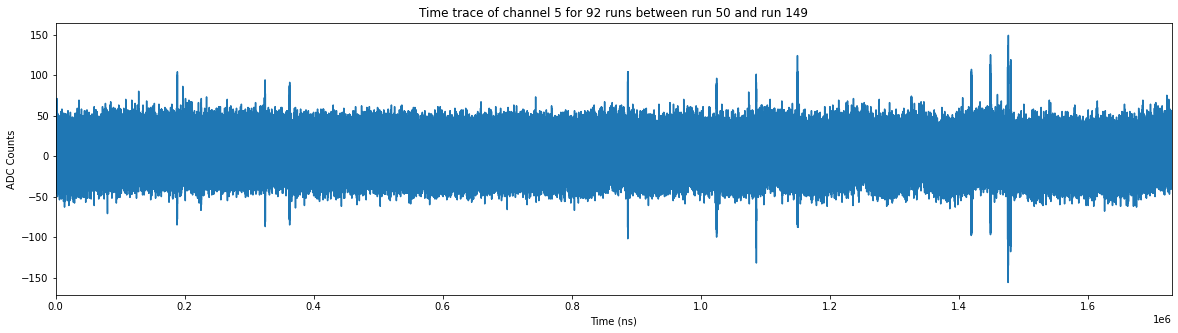

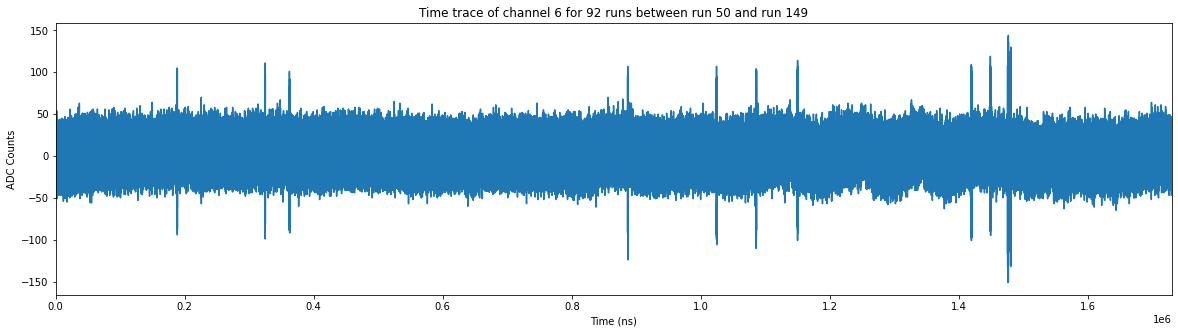

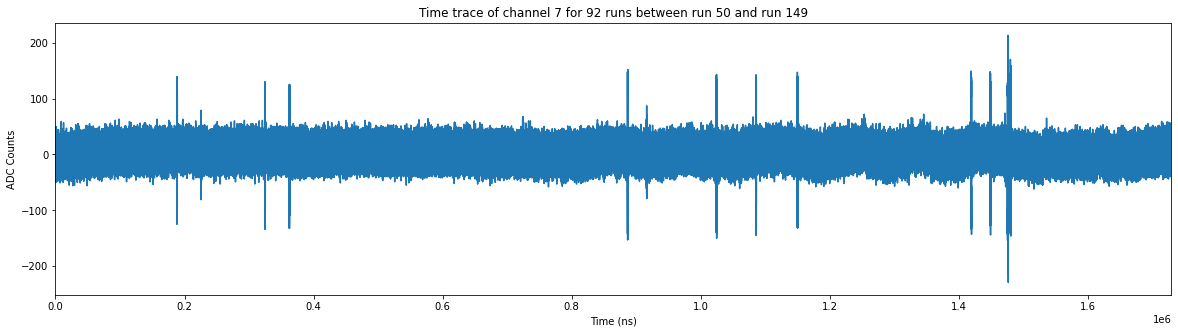

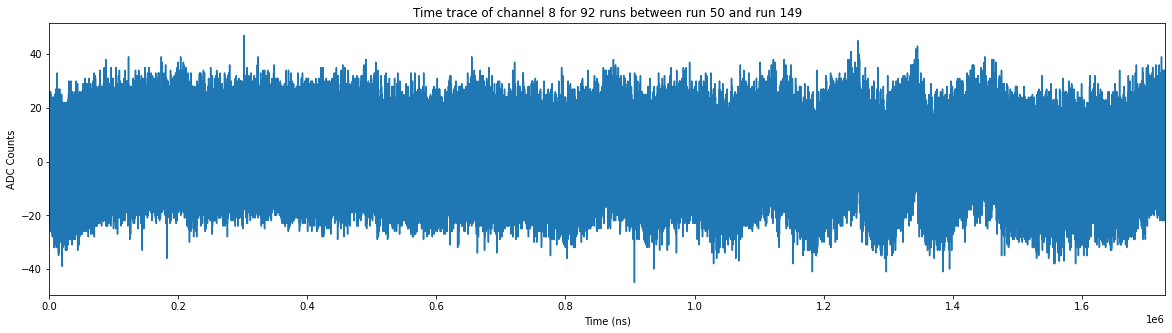

KeyboardInterrupt: 

In [22]:
for ChNr in range(24):
    TimeTraces(21,list(range(50,125)) + list(range(127,150)),ChNr,WPed=False)

Having cut out the most problematic part already leaves us with better results. We can see a certain structure of peaks spanning across multiple channels (e.g. channels 0,5,6,7,9,10,22,23). Channels 13->20 also seem to have something else (semi regular) problematic going on which is responsible for the remaining extreme values in the ADC count distribution.

Any other, similar problems for station 21? <br>
Check entire run history in this way:

In [ ]:
for i in range(0,7):
    TimeTraces(21,range(100*i,100*(1+i)),0,WPed=False)
TimeTraces(21,range(700,713),0,WPed=False)

### Station 22:

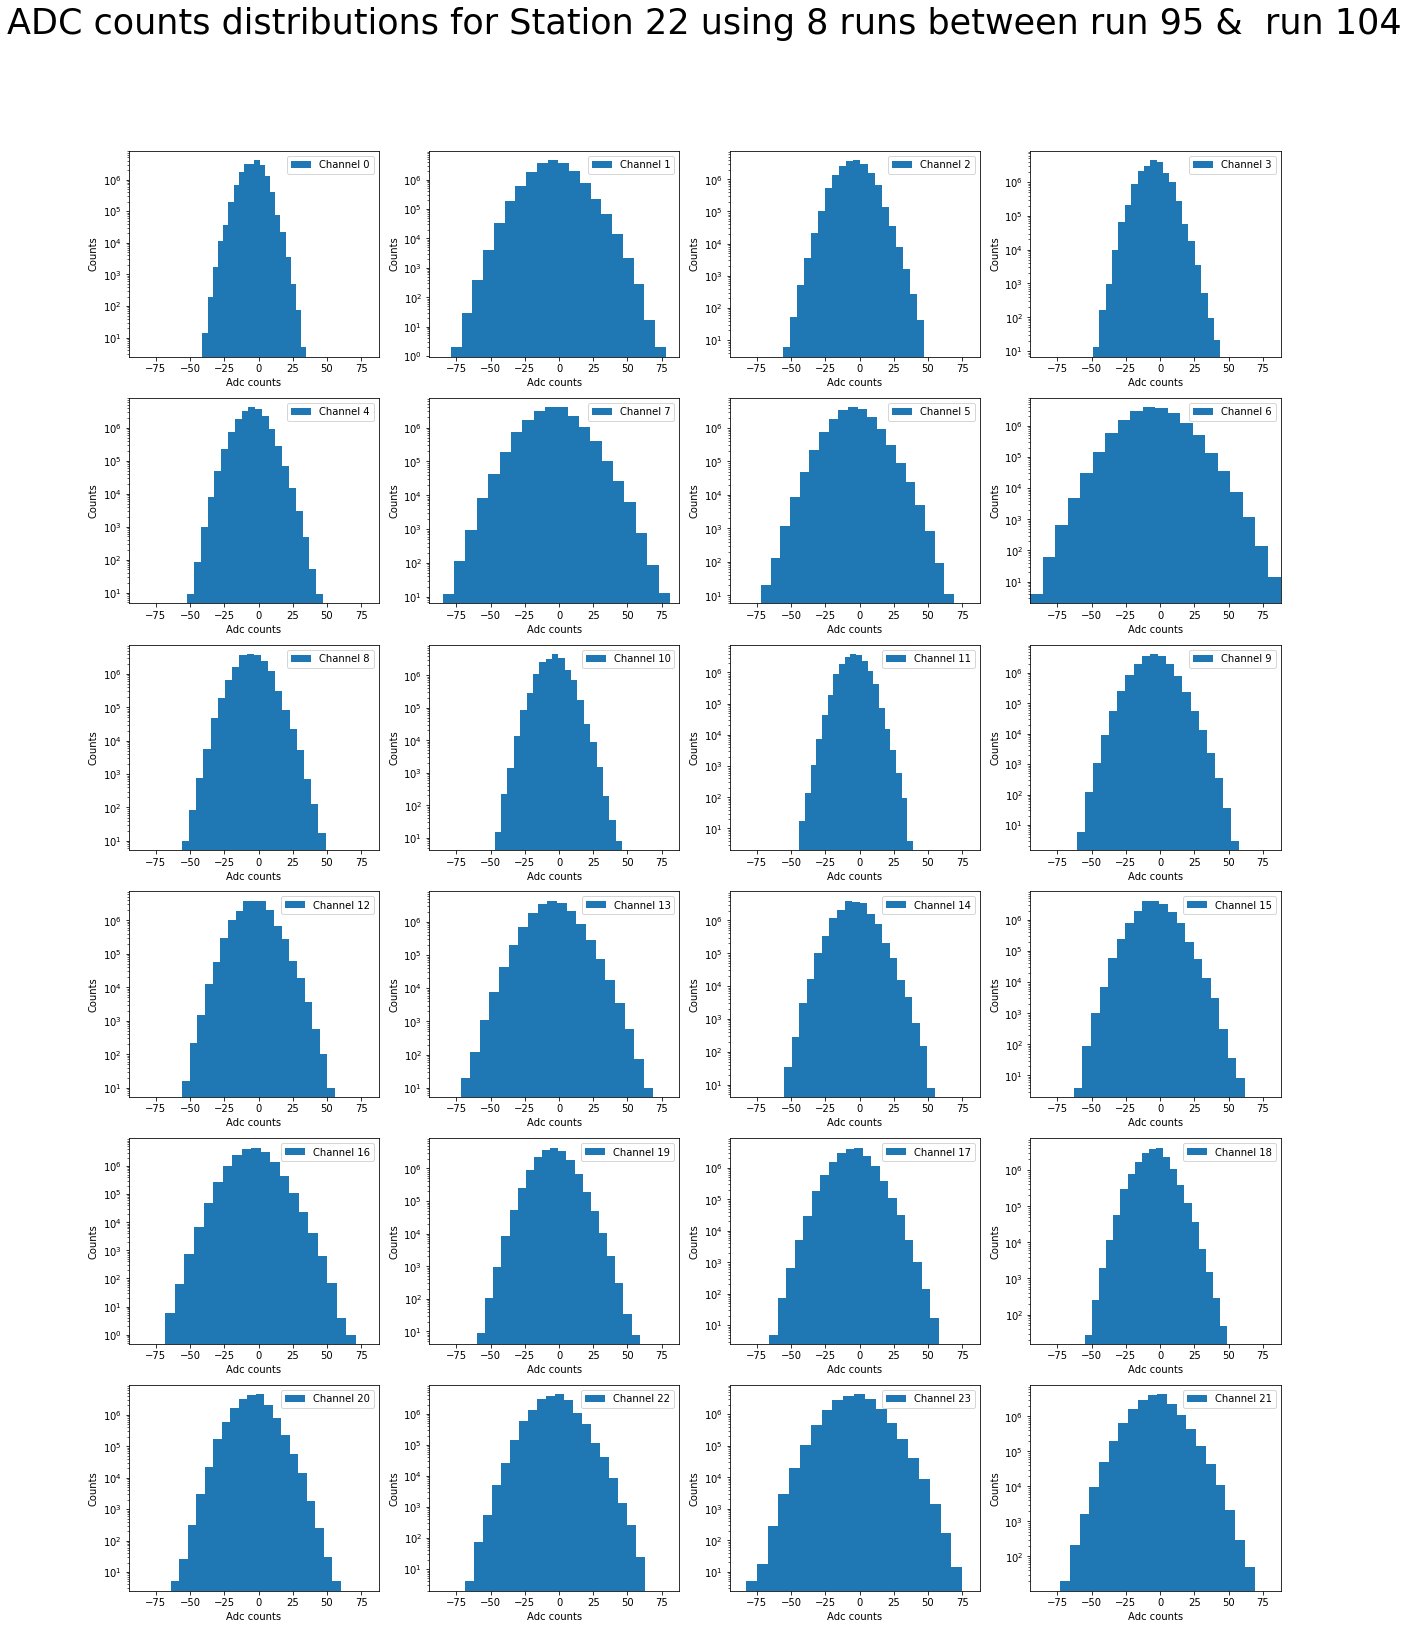

The ADCDist took 37.191370892524716 minutes of time


In [23]:
t0 = time.time()
#ADCDist(22,range(70,130),NBins=20,WPed=False)
ADCDist(22,range(95,105),NBins=20,WPed=False)
dt=time.time() - t0
print("The ADCDist took %s minutes of time" % (dt/60))

Seems normal, however can be misleading due to small amount of runs that were checked <br>
For some reason data from this station took very long to check.

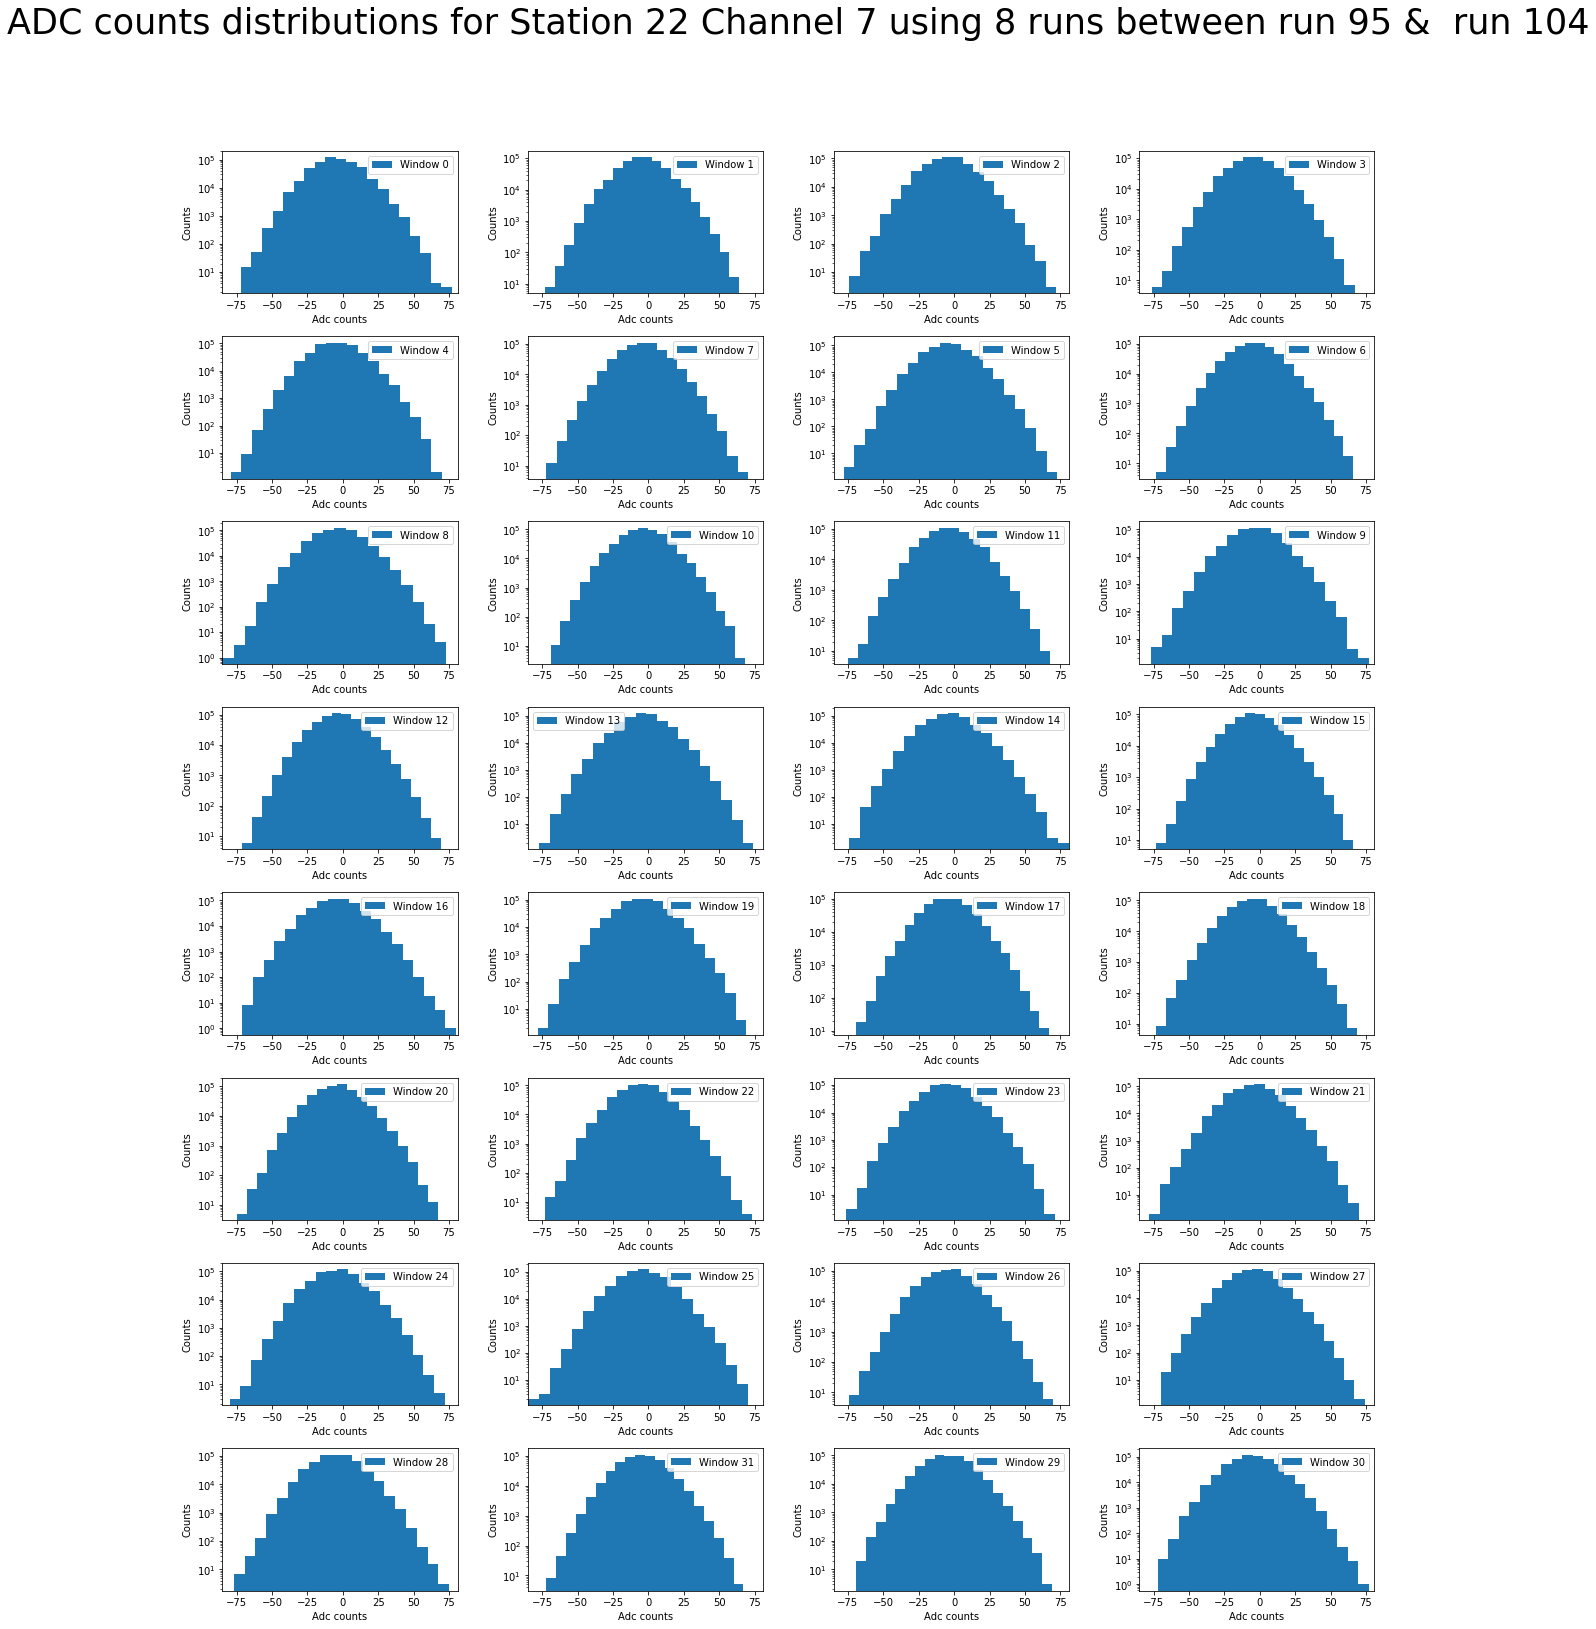

The ADCDistCh took 1.0855823318163553 minutes of time


In [24]:
t0 = time.time()
ADCDistCh(22,7,range(95,105),NBins=20,WPed=False)
dt=time.time() - t0
print("The ADCDistCh took %s minutes of time" % (dt/60))